In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql


In [2]:
# Load the train data

train = pd.read_csv(r"C:\Users\DELL\Downloads\database.csv", header=0)

# Copy to back-up file

train_bk =train.copy()

# Display first 5 values

train.head()


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [3]:
# Display the train data information

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [4]:
# Count the missing values by each variable, if available

train.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [5]:
from sklearn.impute import SimpleImputer

imputer_str = SimpleImputer(missing_values=np.nan, strategy='most_frequent', fill_value=None, verbose=0,
                            copy=True, add_indicator=False)
train['Depth Error']=imputer_str.fit_transform(train[['Depth Error']])
train['Depth Seismic Stations']=imputer_str.fit_transform(train[['Depth Seismic Stations']])
train['Magnitude Type']=imputer_str.fit_transform(train[['Magnitude Type']])
train['Magnitude Error']=imputer_str.fit_transform(train[['Magnitude Error']])
train['Azimuthal Gap']=imputer_str.fit_transform(train[['Azimuthal Gap']])
train['Horizontal Distance']=imputer_str.fit_transform(train[['Horizontal Distance']])
train['Horizontal Error']=imputer_str.fit_transform(train[['Horizontal Error']])
train['Root Mean Square']=imputer_str.fit_transform(train[['Root Mean Square']])
train['Magnitude Seismic Stations']=imputer_str.fit_transform(train[['Magnitude Seismic Stations']])

In [6]:
train.shape

(23412, 21)

In [7]:
# Count the missing values by each variable, if available

train.isnull().sum()

Date                          0
Time                          0
Latitude                      0
Longitude                     0
Type                          0
Depth                         0
Depth Error                   0
Depth Seismic Stations        0
Magnitude                     0
Magnitude Type                0
Magnitude Error               0
Magnitude Seismic Stations    0
Azimuthal Gap                 0
Horizontal Distance           0
Horizontal Error              0
Root Mean Square              0
ID                            0
Source                        0
Location Source               0
Magnitude Source              0
Status                        0
dtype: int64

In [8]:
# count no of unique values for each variable

train.nunique()

Date                          12401
Time                          20472
Latitude                      20676
Longitude                     21474
Type                              4
Depth                          3485
Depth Error                     297
Depth Seismic Stations          736
Magnitude                        64
Magnitude Type                   10
Magnitude Error                 100
Magnitude Seismic Stations      246
Azimuthal Gap                  1109
Horizontal Distance            1448
Horizontal Error                186
Root Mean Square                190
ID                            23412
Source                           13
Location Source                  48
Magnitude Source                 24
Status                            2
dtype: int64

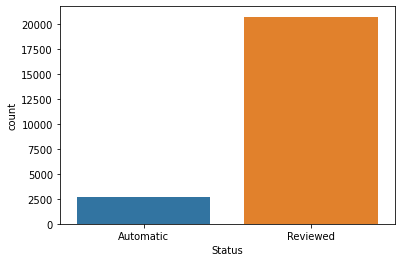

In [9]:
# importing the required library

import seaborn as sns
import matplotlib.pyplot as plt

# read a tips.csv file from seaborn library
df = sns.load_dataset('tips')

# count plot on single categorical variable
sns.countplot(x ='Status', data = train)

# Show the plot
plt.show()


In [10]:
#Using label encoder

from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()

# Identify all the object variables 

objects=['Date', 'Time', 'Type', 'Magnitude Type', 'ID', 'Source',
       'Location Source', 'Magnitude Source', 'Status']

for i in objects:
    train[i]=LE.fit_transform(train[i])
    
#check whether objects are encoded or not.   
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  int32  
 1   Time                        23412 non-null  int32  
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  int32  
 5   Depth                       23412 non-null  float64
 6   Depth Error                 23412 non-null  float64
 7   Depth Seismic Stations      23412 non-null  float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23412 non-null  int32  
 10  Magnitude Error             23412 non-null  float64
 11  Magnitude Seismic Stations  23412 non-null  float64
 12  Azimuthal Gap               23412 non-null  float64
 13  Horizontal Distance         234

In [11]:
#identify the numerical and categorical variables
num_vars=train.columns[train.dtypes!='object']
cat_vars=train.columns[train.dtypes=='object']
print(num_vars)
print(cat_vars)

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')
Index([], dtype='object')


In [12]:
 IndepVar=[]
for col in train.columns:
    if col!='Status':
        IndepVar.append(col)
TargetVar = 'Status'

x = train[IndepVar]
y = train[TargetVar]

In [13]:
# Split the data into train and test

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [14]:
train.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,34,11784,19.246,145.616,0,131.6,1.8,0.0,6.0,5,0.048,1.0,19.0,0.778,6.4,1.0,2579,4,20,11,0
1,101,9865,1.863,127.352,0,80.0,1.8,0.0,5.8,5,0.048,1.0,19.0,0.778,6.4,1.0,2580,4,20,11,0
2,133,15447,-20.579,-173.972,0,20.0,1.8,0.0,6.2,5,0.048,1.0,19.0,0.778,6.4,1.0,2581,4,20,11,0
3,235,16087,-59.076,-23.557,0,15.0,1.8,0.0,5.8,5,0.048,1.0,19.0,0.778,6.4,1.0,2582,4,20,11,0
4,267,11611,11.938,126.427,0,15.0,1.8,0.0,5.8,5,0.048,1.0,19.0,0.778,6.4,1.0,2583,4,20,11,0


In [15]:
x_train

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source
11955,5289,15233,-10.645,112.654,0,39.8,1.8,0.0,5.5,5,0.048,1.0,19.0,0.778,6.4,1.30,13837,11,44,10
18923,2975,234,34.758,25.345,0,45.0,1.8,560.0,5.6,6,0.048,1.0,41.6,0.778,6.4,1.19,20764,11,44,20
15734,1817,16793,-4.454,151.982,0,155.4,1.8,236.0,5.7,6,0.048,1.0,19.0,0.778,6.4,0.86,17585,11,44,20
15908,7240,12283,-1.506,-14.374,0,10.0,1.8,223.0,5.7,7,0.048,1.0,19.0,0.778,6.4,1.10,17759,11,44,10
1150,790,2138,-21.882,-179.498,0,593.5,1.8,0.0,6.7,5,0.048,1.0,19.0,0.778,6.4,1.00,1509,4,20,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,5511,9531,2.617,125.687,0,79.2,1.8,0.0,5.6,5,0.048,1.0,19.0,0.778,6.4,1.10,12859,11,44,10
17289,1897,11583,7.831,94.101,0,22.7,1.8,241.0,5.6,7,0.048,1.0,40.9,0.778,6.4,0.84,19134,11,44,10
5192,5536,9344,-6.528,147.254,0,81.0,1.8,0.0,5.9,0,0.048,1.0,19.0,0.778,6.4,1.00,7189,11,44,20
12172,10259,7043,-6.183,129.446,0,264.1,1.8,0.0,5.9,5,0.048,1.0,19.0,0.778,6.4,1.00,14049,11,44,10


In [16]:
# Count the target or dependent variable by '0' & '1' and 
# their proportion (> 10 : 1, then the dataset is imbalance dataset)

count = train.Status.value_counts()
print('Class 0:', count[0])
print('Class 1:', count[1])
print('Proportion:', round(count[0] /count[1], 2), ': 1')
print('Total records', len(train))

Class 0: 2639
Class 1: 20773
Proportion: 0.13 : 1
Total records 23412


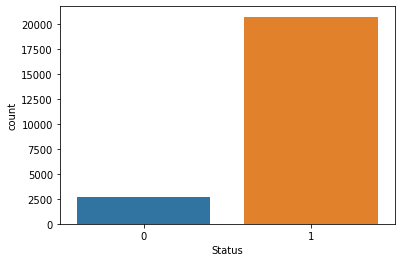

In [17]:
# importing the required library

import seaborn as sns
import matplotlib.pyplot as plt

# read a tips.csv file from seaborn library
df = sns.load_dataset('tips')

# count plot on single categorical variable
sns.countplot(x ='Status', data = train)

# Show the plot
plt.show()


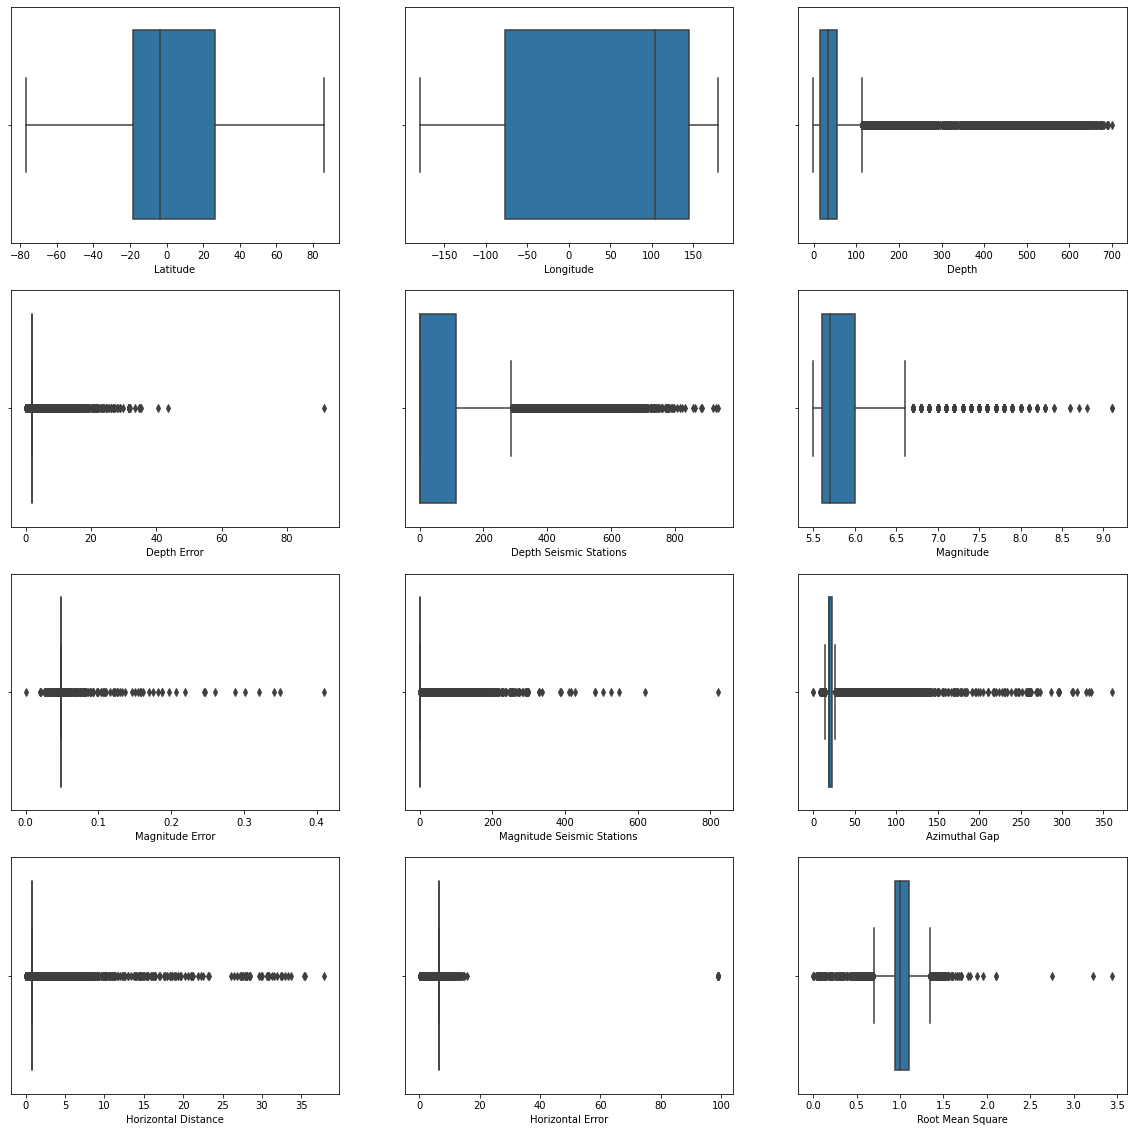

In [18]:
#Are there any outliers

df_num = train.select_dtypes(include=["float64","int64"])
fig, ax = plt.subplots(nrows = 4, ncols = 3, figsize=(20, 20))
for variable, subplot in zip(df_num.columns, ax.flatten()):
    sns.boxplot(train[variable], ax = subplot)
plt.show()

In [19]:
Results = pd.read_csv(r"C:\Users\DELL\Downloads\HTResults1.csv", header=0)
Results.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[4096   31]
 [  66  490]]
Outcome values : 
 4096 31 66 490
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.99      0.99      4127
           0       0.94      0.88      0.91       556

    accuracy                           0.98      4683
   macro avg       0.96      0.94      0.95      4683
weighted avg       0.98      0.98      0.98      4683

Accuracy : 97.9 %
Precision : 98.4 %
Recall : 99.2 %
F1 Score : 0.988
Specificity or True Negative Rate : 88.1 %
Balanced Accuracy : 93.6 %
MCC : 0.899
roc_auc_score: 0.937


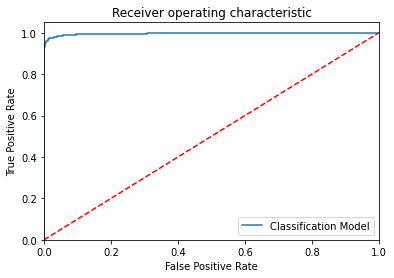

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[4126    1]
 [   0  556]]
Outcome values : 
 4126 1 0 556
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      4127
           0       1.00      1.00      1.00       556

    accuracy                           1.00      4683
   macro avg       1.00      1.00      1.00      4683
weighted avg       1.00      1.00      1.00      4683

Accuracy : 100.0 %
Precision : 100.0 %
Recall : 100.0 %
F1 Score : 1.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 100.0 %
MCC : 0.999
roc_auc_score: 1.0


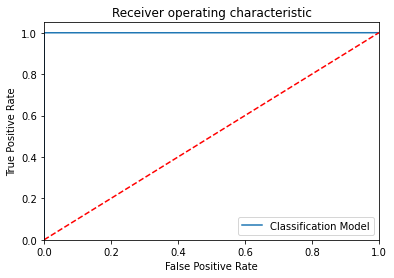

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[4127    0]
 [   0  556]]
Outcome values : 
 4127 0 0 556
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      4127
           0       1.00      1.00      1.00       556

    accuracy                           1.00      4683
   macro avg       1.00      1.00      1.00      4683
weighted avg       1.00      1.00      1.00      4683

Accuracy : 100.0 %
Precision : 100.0 %
Recall : 100.0 %
F1 Score : 1.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 100.0 %
MCC : 1.0
roc_auc_score: 1.0


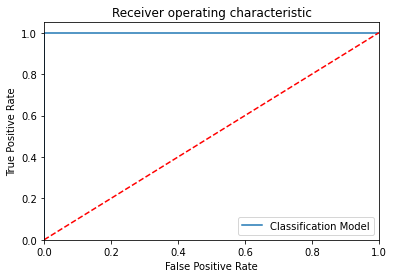

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[4127    0]
 [   0  556]]
Outcome values : 
 4127 0 0 556
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      4127
           0       1.00      1.00      1.00       556

    accuracy                           1.00      4683
   macro avg       1.00      1.00      1.00      4683
weighted avg       1.00      1.00      1.00      4683

Accuracy : 100.0 %
Precision : 100.0 %
Recall : 100.0 %
F1 Score : 1.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 100.0 %
MCC : 1.0
roc_auc_score: 1.0


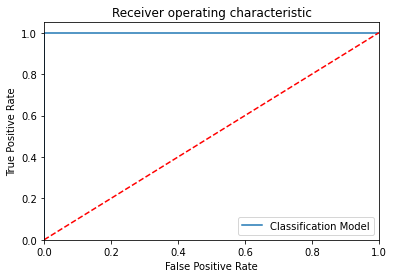

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[4101   26]
 [  20  536]]
Outcome values : 
 4101 26 20 536
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.99      0.99      4127
           0       0.95      0.96      0.96       556

    accuracy                           0.99      4683
   macro avg       0.97      0.98      0.98      4683
weighted avg       0.99      0.99      0.99      4683

Accuracy : 99.0 %
Precision : 99.5 %
Recall : 99.4 %
F1 Score : 0.994
Specificity or True Negative Rate : 96.4 %
Balanced Accuracy : 97.9 %
MCC : 0.953
roc_auc_score: 0.979


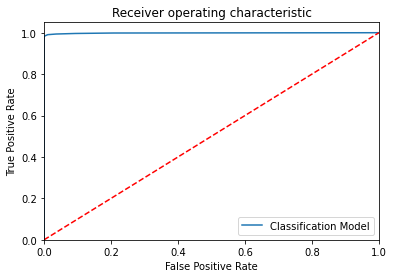

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[4127    0]
 [   0  556]]
Outcome values : 
 4127 0 0 556
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      4127
           0       1.00      1.00      1.00       556

    accuracy                           1.00      4683
   macro avg       1.00      1.00      1.00      4683
weighted avg       1.00      1.00      1.00      4683

Accuracy : 100.0 %
Precision : 100.0 %
Recall : 100.0 %
F1 Score : 1.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 100.0 %
MCC : 1.0
roc_auc_score: 1.0


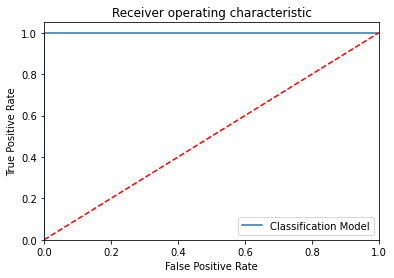

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier(loss='deviance')
Confusion matrix : 
 [[4127    0]
 [   0  556]]
Outcome values : 
 4127 0 0 556
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      4127
           0       1.00      1.00      1.00       556

    accuracy                           1.00      4683
   macro avg       1.00      1.00      1.00      4683
weighted avg       1.00      1.00      1.00      4683

Accuracy : 100.0 %
Precision : 100.0 %
Recall : 100.0 %
F1 Score : 1.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 100.0 %
MCC : 1.0
roc_auc_score: 1.0


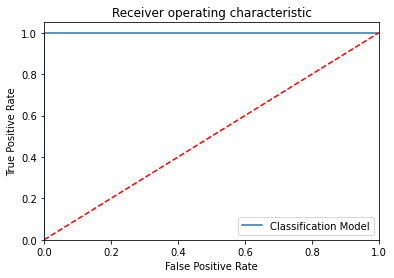

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[4127    0]
 [   0  556]]
Outcome values : 
 4127 0 0 556
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      4127
           0       1.00      1.00      1.00       556

    accuracy                           1.00      4683
   macro avg       1.00      1.00      1.00      4683
weighted avg       1.00      1.00      1.00      4683

Accuracy : 100.0 %
Precision : 100.0 %
Recall : 100.0 %
F1 Score : 1.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 100.0 %
MCC : 1.0
roc_auc_score: 1.0


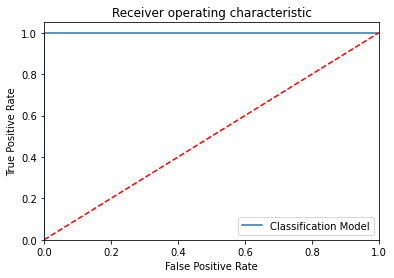

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[4127    0]
 [   0  556]]
Outcome values : 
 4127 0 0 556
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      4127
           0       1.00      1.00      1.00       556

    accuracy                           1.00      4683
   macro avg       1.00      1.00      1.00      4683
weighted avg       1.00      1.00      1.00      4683

Accuracy : 100.0 %
Precision : 100.0 %
Recall : 100.0 %
F1 Score : 1.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 100.0 %
MCC : 1.0
roc_auc_score: 1.0


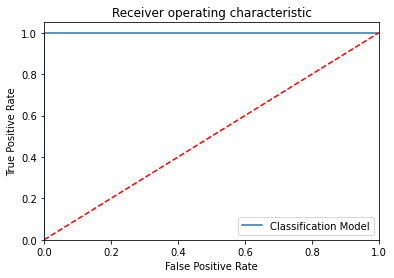

-----------------------------------------------------------------------------------------------------


In [20]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)

modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,
                             bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,
                             n_jobs=None, random_state=None, verbose=0)

ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, 
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                      init=None, random_state=None,
                                     max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, modelBAG, ModelGB, ModelLGB, ModelGNB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    Results = Results.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [21]:
Results

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),4096,31,66,490,0.979,0.984,0.992,0.988,0.881,0.899,0.936892,0.936
1,DecisionTreeClassifier(),4126,1,0,556,1.000,1.000,1.000,1.000,1.000,0.999,0.999879,1.000
2,"(DecisionTreeClassifier(max_features='sqrt', r...",4127,0,0,556,1.000,1.000,1.000,1.000,1.000,1.000,1.000000,1.000
3,"(ExtraTreeClassifier(random_state=382269914), ...",4127,0,0,556,1.000,1.000,1.000,1.000,1.000,1.000,1.000000,1.000
4,KNeighborsClassifier(),4101,26,20,536,0.990,0.995,0.994,0.994,0.964,0.953,0.978864,0.979
5,(DecisionTreeClassifier(random_state=113785970...,4127,0,0,556,1.000,1.000,1.000,1.000,1.000,1.000,1.000000,1.000
6,([DecisionTreeRegressor(criterion='friedman_ms...,4127,0,0,556,1.000,1.000,1.000,1.000,1.000,1.000,1.000000,1.000
7,LGBMClassifier(),4127,0,0,556,1.000,1.000,1.000,1.000,1.000,1.000,1.000000,1.000
8,GaussianNB(),4127,0,0,556,1.000,1.000,1.000,1.000,1.000,1.000,1.000000,1.000


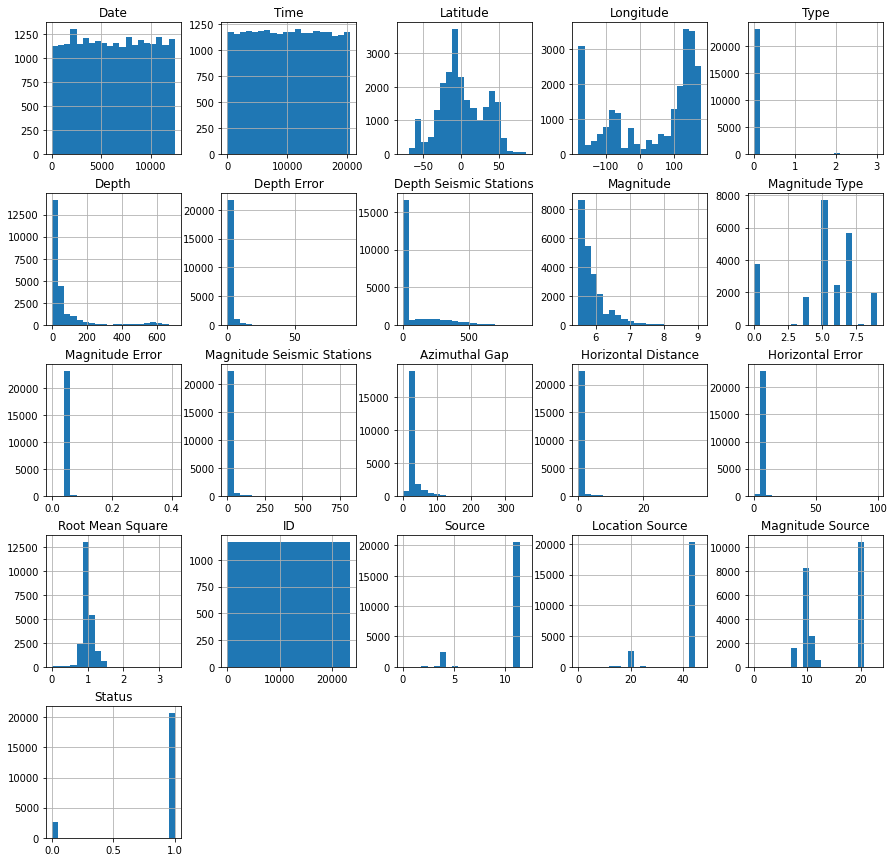

In [22]:


# creating a basic histogram
train.hist(figsize=[15, 15], bins=20)
plt.show()


In [23]:
y_pred = ModelET.predict(x_train)
y_pred

array([1, 1, 1, ..., 1, 1, 0])

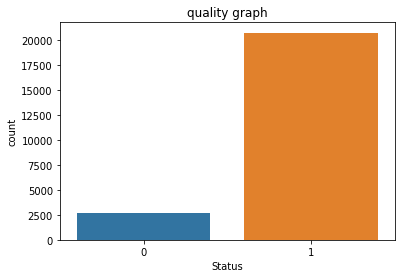

In [25]:
import seaborn as sns
sns.countplot(x='Status', data=train)
plt.title("quality graph")
plt.show()

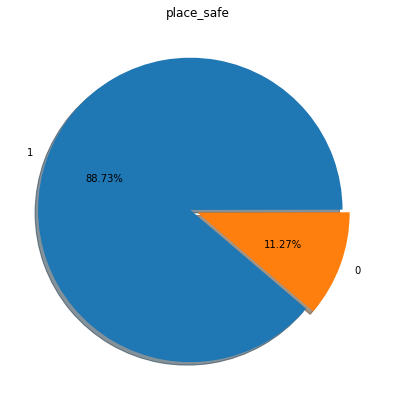

(0, 21) (0, 21)


In [26]:
def draw_pie_plot(column, title, **kvargs):
    explode = np.zeros(len(column.unique()))
    explode[:-1] = 0.05
    
    column.value_counts().plot(
        kind='pie',
        title=title, 
        ylabel="",  
        autopct='%1.2f%%', 
        explode=explode, 
        shadow=True,
        startangle=0.1,
        **kvargs
    )
draw_pie_plot(train['Status'], "place_safe", figsize=(7, 7))
plt.show()

safe = train[train['Status'] == 'safe']
unsafe = train[train['Status'] == 'unsafe']

print(safe.shape, unsafe.shape)

<AxesSubplot:>

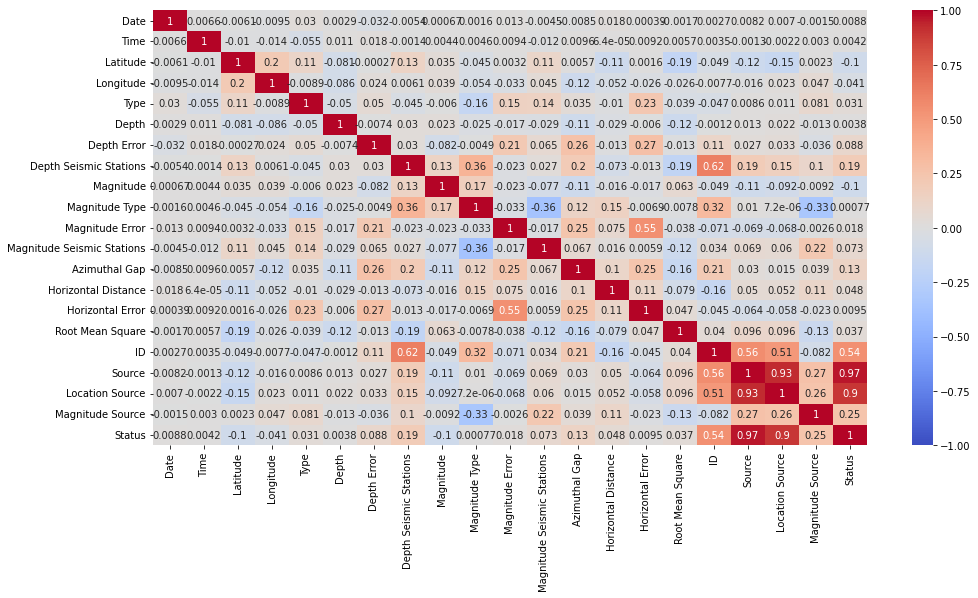

In [27]:
# Making a heatmap for the numeric data to understand how they correlate in pairs
plt.figure(figsize=(16,8))
sns.heatmap(train.corr(),annot=True,cmap="coolwarm", vmin=-1)